In [1]:
import pandas as pd 
import seaborn as sns

C:\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# input data
x = df[['CreditScore','Age',"Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]]
# output data
y = df["Exited"]

In [11]:
x.shape

(10000, 8)

In [13]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


<AxesSubplot:xlabel='Exited', ylabel='count'>

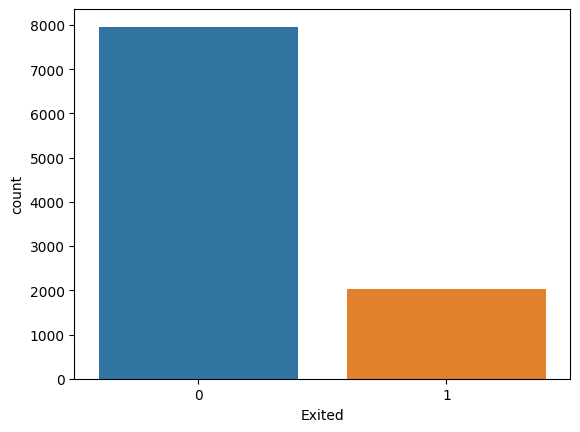

In [14]:
sns.countplot(x=y)

In [15]:
# Normalize
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
x_scaled = scaler.fit_transform(x)

In [18]:
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [19]:
# Cross Validation
from sklearn.model_selection import train_test_split

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=0,test_size=0.25) 

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
ann = MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=0,max_iter=100,activation="relu")

In [23]:
ann.fit(x_train,y_train)

C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [24]:
y_pred = ann.predict(x_test)

In [27]:
y_test.value_counts()

0    1991
1     509
Name: Exited, dtype: int64

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

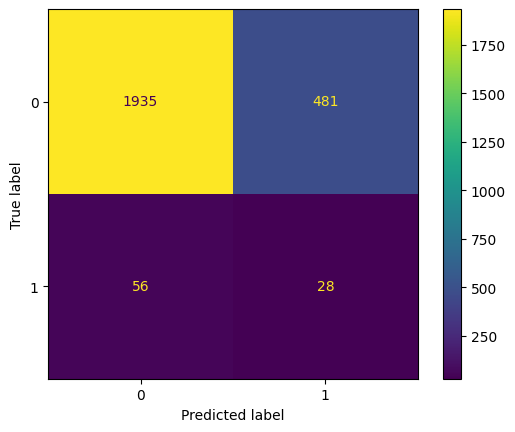

In [28]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)

In [29]:
accuracy_score(y_pred,y_test)

0.7852